In [1]:
import cv2
import mediapipe as mp

mp_face = mp.solutions.face_detection
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

face_detection = mp_face.FaceDetection()
hands = mp_hands.Hands()
pose = mp_pose.Pose()

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error al leer el frame")
        break

    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_results = face_detection.process(img)
    hands_results = hands.process(img)
    pose_results = pose.process(frame)

    if face_results.detections:
        for detection in face_results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = frame.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(frame, bbox, (0, 255, 0), 2)

    if hands_results.multi_hand_landmarks:
        for landmarks in hands_results.multi_hand_landmarks:
            for point in landmarks.landmark:
                x, y = int(point.x * frame.shape[1]), int(point.y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

    if pose_results.pose_landmarks:
        for point in pose_results.pose_landmarks.landmark:
            x, y = int(point.x * frame.shape[1]), int(point.y * frame.shape[0])
            cv2.circle(frame, (x, y), 5, (255, 0, 0), -1)

    cv2.imshow('MediaPipe Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar los recursos
cap.release()
cv2.destroyAllWindows()


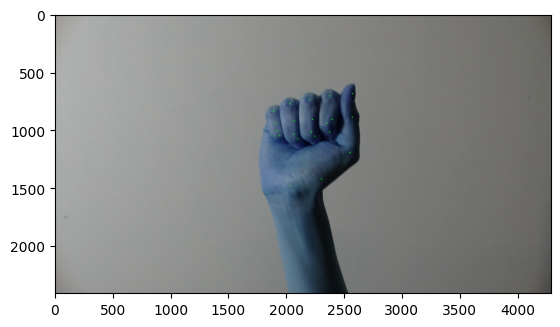

In [2]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

mp_face = mp.solutions.face_detection
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

face_detection = mp_face.FaceDetection()
hands = mp_hands.Hands()
pose = mp_pose.Pose()

frame = cv2.imread('./classes_original/A/DSC00882.JPG')
# plt.imshow(frame)

img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# face_results = face_detection.process(img)
hands_results = hands.process(img)
# pose_results = pose.process(frame)

# if face_results.detections:
#     for detection in face_results.detections:
#         bboxC = detection.location_data.relative_bounding_box
#         ih, iw, _ = frame.shape
#         bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
#                 int(bboxC.width * iw), int(bboxC.height * ih)
#         cv2.rectangle(frame, bbox, (0, 255, 0), 2)

if hands_results.multi_hand_landmarks:
    for landmarks in hands_results.multi_hand_landmarks:
        for point in landmarks.landmark:
            x, y = int(point.x * frame.shape[1]), int(point.y * frame.shape[0])
            cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

# if pose_results.pose_landmarks:
#     for point in pose_results.pose_landmarks.landmark:
#         x, y = int(point.x * frame.shape[1]), int(point.y * frame.shape[0])
#         cv2.circle(frame, (x, y), 5, (255, 0, 0), -1)

plt.imshow(frame)